<a href="https://colab.research.google.com/github/FarzanaEva/Practice-NLP/blob/master/Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import L2

In [2]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info = True, as_supervised  = True)

train_dataset, test_dataset = dataset['train'], dataset['test']

In [3]:
encoder = info.features['text'].encoder
print('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8185


In [4]:
sample_string = "Hello TensorFlow."

encoded_string = encoder.encode(sample_string)
print('Encoded_string is {}'.format(encoded_string))

original_string = encoder.decode(encoded_string)
print('The original string: "{}"'. format(original_string))

Encoded_string is [4025, 222, 6307, 2327, 4043, 2120, 7975]
The original string: "Hello TensorFlow."


In [5]:
assert original_string == sample_string

In [6]:
for index in encoded_string:
  print('{} ----> {}'.format(index, encoder.decode([index])))

4025 ----> Hell
222 ----> o 
6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
7975 ----> .


In [7]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [8]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE)

test_dataset = test_dataset.padded_batch(BATCH_SIZE)

In [9]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(encoder.vocab_size, 150),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, return_sequences= True)),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=L2()),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.compile(loss='binary_crossentropy', 
              optimizer = 'adam',
              metrics = ['accuracy'])

In [11]:
history = model.fit(train_dataset, epochs = 50, validation_data = test_dataset)

Epoch 1/50
391/391 [==============================] - 147s 375ms/step - loss: 0.8550 - accuracy: 0.5262 - val_loss: 0.6787 - val_accuracy: 0.6256
Epoch 2/50
391/391 [==============================] - 145s 372ms/step - loss: 0.6568 - accuracy: 0.6316 - val_loss: 0.6699 - val_accuracy: 0.5911
Epoch 3/50
391/391 [==============================] - 145s 372ms/step - loss: 0.5840 - accuracy: 0.7106 - val_loss: 0.6786 - val_accuracy: 0.6372
Epoch 4/50
391/391 [==============================] - 145s 372ms/step - loss: 0.5199 - accuracy: 0.7620 - val_loss: 0.4876 - val_accuracy: 0.7638
Epoch 5/50
391/391 [==============================] - 144s 369ms/step - loss: 0.3939 - accuracy: 0.8328 - val_loss: 0.3982 - val_accuracy: 0.8295
Epoch 6/50
391/391 [==============================] - 145s 372ms/step - loss: 0.3072 - accuracy: 0.8841 - val_loss: 0.3993 - val_accuracy: 0.8280
Epoch 7/50
391/391 [==============================] - 145s 371ms/step - loss: 0.2736 - accuracy: 0.8974 - val_loss: 0.3646 -

In [12]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history["val_"+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, "val_"+metric])
  plt.show()

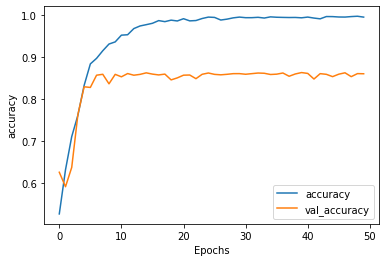

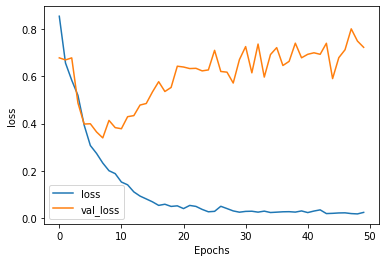

In [13]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [14]:
def pad_to_zero(vec, size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec

In [15]:
def sample_predict(sample_pred_text, pad):
  encoded_sample_pred_text = encoder.encode(sample_pred_text)

  if pad:
    encoded_sample_pred_text = pad_to_zero(encoded_sample_pred_text, 64)
  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))

  return (predictions)

In [16]:
sample_pred_text = ('The movie was not good. The animation and the graphics were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=False)
print(predictions)

[[0.00102995]]


In [17]:
# predict on a sample text with padding
predictions = sample_predict(sample_pred_text, pad=True)
print(predictions)


[[0.00125586]]
